In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, classification_report, confusion_matrix, accuracy_score, precision_recall_fscore_support
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.stats import mode

df = pd.read_csv('Wholesale customers data.csv')
display(df.head())

,Channel,Region,Fresh,Milk,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,214,2674,1338
1,2,3,7057,9810,1762,3293,1776
2,2,3,6353,8808,2405,3516,7844
3,1,3,13265,1196,6404,507,1788
4,2,3,22615,5410,3915,1777,5185


# Task 1: Data preprocessing

In [ ]:
df.shape

(440, 7)

In [ ]:
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Frozen            440 non-null    int64
 5   Detergents_Paper  440 non-null    int64
 6   Delicassen        440 non-null    int64
dtypes: int64(7)
memory usage: 24.2 KB


,0
Channel,0
Region,0
Fresh,0
Milk,0
Frozen,0
Detergents_Paper,0
Delicassen,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
# Features
labels = [c for c in df.columns if c.lower() in ["region","channel"]]
features = [c for c in df.columns if c not in labels]


X = df[features].select_dtypes(include=[np.number]).copy()
y_region = df["Region"] if "Region" in df.columns else None  # task 4 superviszxed learning

# Fit the scaler only on the training data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Correlation Matrix
corr_matrix = X.corr()
display(corr_matrix)

,Fresh,Milk,Frozen,Detergents_Paper,Delicassen
Fresh,1.000000,0.100510,0.345881,-0.101953,0.244690
Milk,0.100510,1.000000,0.123994,0.661816,0.406368
Frozen,0.345881,0.123994,1.000000,-0.131525,0.390947
Detergents_Paper,-0.101953,0.661816,-0.131525,1.000000,0.069291
Delicassen,0.244690,0.406368,0.390947,0.069291,1.000000


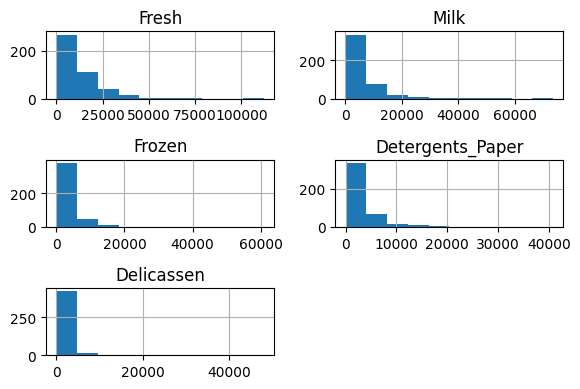

In [ ]:
X_scaled_df = pd.DataFrame(X, columns=features)
X_scaled_df.hist(figsize=(6, 4));
plt.tight_layout();

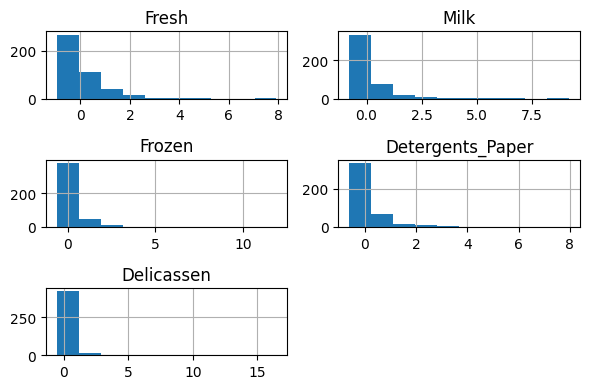

In [ ]:
X_scaled_df = pd.DataFrame(X_scaled, columns=features)
X_scaled_df.hist(figsize=(6, 4));
plt.tight_layout();

# Kmeans Clustering

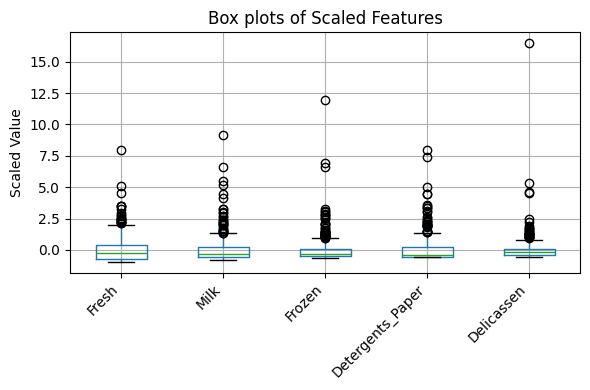

In [ ]:
X_scaled_df.boxplot(figsize=(6, 4));
plt.title('Box plots of Scaled Features');
plt.ylabel('Scaled Value');
plt.xticks(rotation=45, ha='right');
plt.tight_layout();

# Doublecheck!!!!!: Keep outliers or not

In [ ]:
# Variance check
# PCA
pca2 = PCA(n_components=2, random_state=1)
X_pca2 = pca2.fit_transform(X_scaled)

# variance ratio per component
print("Variance of each PC:", pca2.explained_variance_ratio_)

# Total variance
total_var = pca2.explained_variance_ratio_.sum() * 100
print(f"Total variance of both: {total_var:.2f}%")

Variance of each PC: [0.38319795 0.31107581]
Total variance of both: 69.43%


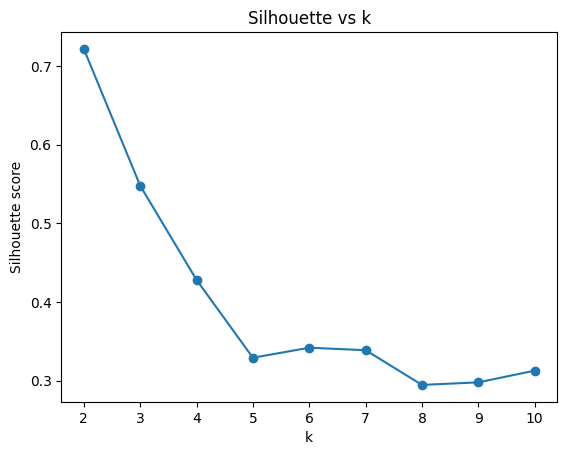

Chosen k (by silhouette): 2


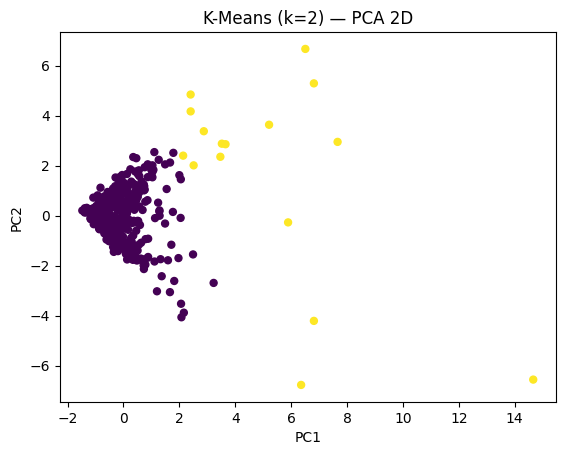

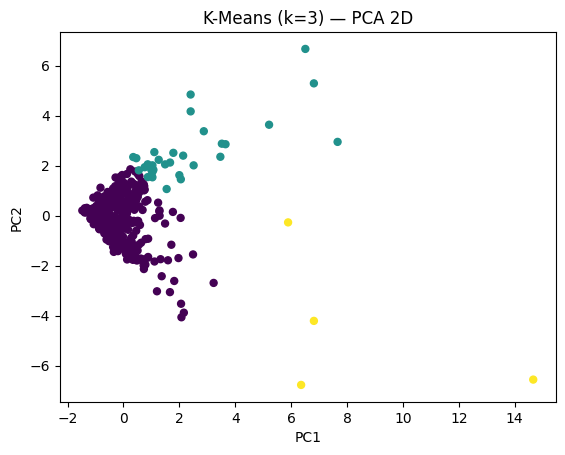

In [ ]:
# Kmeans Model
Ks = range(2, 11)
inertias, sils = [], []

for k in Ks:
    km = KMeans(n_clusters=k, n_init=20, random_state=1)
    labels_k = km.fit_predict(X_scaled)
    inertias.append(km.inertia_)
    sils.append(silhouette_score(X_scaled, labels_k))

# Plot elbow and silhouette
plt.figure(); plt.plot(Ks, sils, marker='o'); plt.xlabel("k"); plt.ylabel("Silhouette score"); plt.title("Silhouette vs k")
plt.show()

# How many k?
k_opt = Ks[int(np.argmax(sils))]
print("Chosen k (by silhouette):", k_opt)

# Fitting final optimal number of k
kmeans_opt = KMeans(n_clusters=k_opt, n_init=20, algorithm='lloyd', random_state=1)
kmeans_labels_opt = kmeans_opt.fit_predict(X_scaled)

# Optimal k
pca2 = PCA(n_components=2, random_state=1)
X_pca2 = pca2.fit_transform(X_scaled)

plt.figure()
plt.scatter(X_pca2[:,0], X_pca2[:,1], c=kmeans_labels_opt, s=25)
plt.title(f"K-Means (k={k_opt}) — PCA 2D")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.show()

# 3 clsuters
kmeans_3 = KMeans(n_clusters=3, n_init=20, random_state=1)
kmeans_labels_3 = kmeans_3.fit_predict(X_scaled)

plt.figure()
plt.scatter(X_pca2[:,0], X_pca2[:,1], c=kmeans_labels_3, s=25)
plt.title("K-Means (k=3) — PCA 2D")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.show()

# Heirarchical

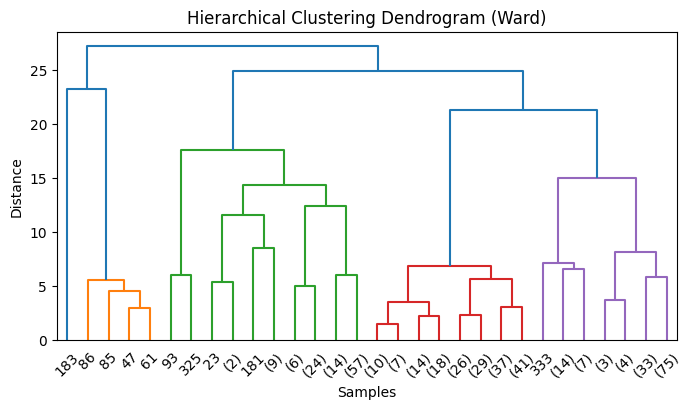

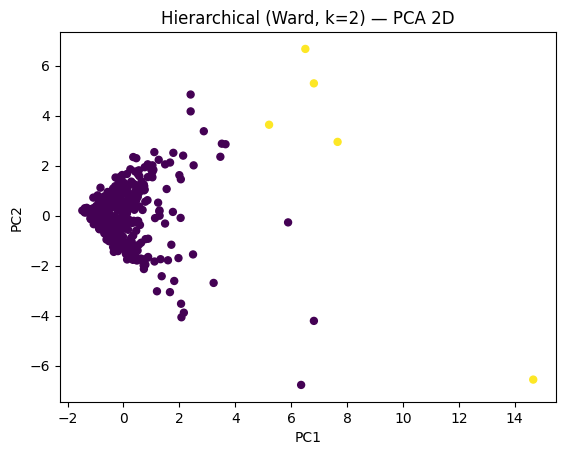

In [ ]:
# Dendrogram
Z = linkage(X_scaled, method='ward')
plt.figure(figsize=(8,4))
dendrogram(Z, truncate_mode='level', p=5)
plt.title("Hierarchical Clustering Dendrogram (Ward)")
plt.xlabel("Samples"); plt.ylabel("Distance")
plt.show()

agg = AgglomerativeClustering(n_clusters=k_opt, linkage='ward')
hier_labels = agg.fit_predict(X_scaled)

# Visualisation
plt.figure()
plt.scatter(X_pca2[:,0], X_pca2[:,1], c=hier_labels, s=25)
plt.title(f"Hierarchical (Ward, k={k_opt}) — PCA 2D")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.show()


In [ ]:
# K-Means average customer per cluster
model2 = kmeans_opt

centroids_scaled = model2.cluster_centers_
centroids_orig = pd.DataFrame(scaler.inverse_transform(centroids_scaled),
                              columns=X.columns,
                              index=[f"KM_{i}" for i in range(k_opt)])
print("K-Means average customer per cluster:")
print(centroids_orig.round(2))

# Hierarchical average customer per cluster
df_hier = X.copy()
df_hier["hier_label"] = hier_labels
hier_profiles = df_hier.groupby("hier_label").mean()
hier_profiles.index = [f"HC_{i}" for i in hier_profiles.index]
print("Hierarchical average customer per cluster:")
print(hier_profiles.round(2))

K-Means average customer per cluster:
         Fresh      Milk   Frozen  Detergents_Paper  Delicassen
KM_0  11562.35   4777.25  2830.24           2328.13      1309.0
KM_1  23606.00  32800.12  9476.69          17545.56      7245.5
Hierarchical average customer per cluster:
         Fresh      Milk   Frozen  Detergents_Paper  Delicassen
HC_0  11778.93   5273.76  2993.26           2657.12     1403.84
HC_1  31259.40  51254.60  9916.60          22401.60    12054.40


# Silhouette score for each cluster model (2 clusters)

In [ ]:
sil_km  = silhouette_score(X_scaled, kmeans_labels_opt)
sil_hc  = silhouette_score(X_scaled, hier_labels)
print(f"K-Means: {sil_km:.3f} | Hierarchical: {sil_hc:.3f}")

K-Means: 0.722 | Hierarchical: 0.793


# Task 4

Class distribution for Region:
Region
3    316
1     77
2     47
Name: count, dtype: int64


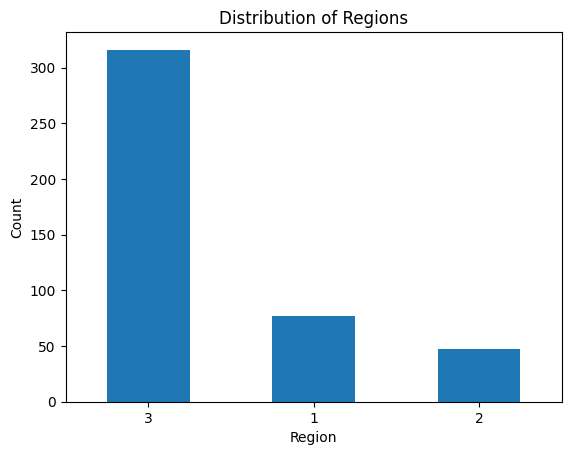

In [ ]:
# Class imbalance for y_region
print("Class distribution for Region:")
print(y_region.value_counts())

y_region.value_counts().plot(kind='bar')
plt.title('Distribution of Regions')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [ ]:
labels = [c for c in df.columns if c.lower() in ["region","channel"]]
features = [c for c in df.columns if c not in labels]


X = df[features].select_dtypes(include=[np.number]).copy()
y_region = df["Region"] if "Region" in df.columns else None

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y_region, stratify = y_region, test_size=0.3, random_state=1)

# Standardisation
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [ ]:
# Random Forest + PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA
import numpy as np

# PCA
pca = PCA(n_components=0.95, random_state=1)

Xtr_pca = pca.fit_transform(x_train_scaled)   # x_train_scaled is already scaled
Xte_pca = pca.transform(x_test_scaled)       # transform test with the SAME PCA

print("PCA components kept:", pca.n_components_)
print("Explained variance ratio per PC:", np.round(pca.explained_variance_ratio_, 4))
print("Total explained variance: {:.2f}%".format(100 * pca.explained_variance_ratio_.sum()))

# Train
rf_pca = RandomForestClassifier(random_state=1, class_weight='balanced')

# Fit
rf_pca.fit(Xtr_pca, y_train)

# Predict
y_pred_rf_pca = rf_pca.predict(Xte_pca)

# Evaluate
accuracy_rf_pca = accuracy_score(y_test, y_pred_rf_pca)
print(f"\nRandom Forest Model Accuracy (with PCA): {accuracy_rf_pca:.4f}\n")

print("Classification Report (Random Forest with PCA):")
print(classification_report(y_test, y_pred_rf_pca))

print("Confusion Matrix (Random Forest with PCA):")
print(confusion_matrix(y_test, y_pred_rf_pca, labels=np.unique(y_test)))

PCA components kept: 4
Explained variance ratio per PC: [0.3976 0.2879 0.1479 0.1325]
Total explained variance: 96.59%

Random Forest Model Accuracy (with PCA): 0.6894

Classification Report (Random Forest with PCA):
              precision    recall  f1-score   support

           1       0.25      0.04      0.07        23
           2       0.00      0.00      0.00        14
           3       0.71      0.95      0.81        95

    accuracy                           0.69       132
   macro avg       0.32      0.33      0.30       132
weighted avg       0.56      0.69      0.60       132

Confusion Matrix (Random Forest with PCA):
[[ 1  0 22]
 [ 0  0 14]
 [ 3  2 90]]


In [ ]:
# Baseline LOGREG
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

# Train
lr = LogisticRegression(random_state=1, multi_class='multinomial', solver='lbfgs', max_iter=1000)

# Fit
lr.fit(x_train_scaled, y_train)

# Predict
y_pred_logreg = lr.predict(x_test_scaled)

# Evaluate
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"Logistic Regression Model Accuracy: {accuracy_logreg:.4f}\n")

print("Classification Report (Logistic Regression):")
print(classification_report(y_test, y_pred_logreg))

print("Confusion Matrix (Logistic Regression):")
print(confusion_matrix(y_test, y_pred_logreg, labels=np.unique(y_test)))


Logistic Regression Model Accuracy: 0.7121

Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        23
           2       0.00      0.00      0.00        14
           3       0.72      0.99      0.84        95

    accuracy                           0.71       132
   macro avg       0.24      0.33      0.28       132
weighted avg       0.52      0.71      0.60       132

Confusion Matrix (Logistic Regression):
[[ 0  0 23]
 [ 1  0 13]
 [ 1  0 94]]


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: 

In [ ]:
# LOGREG + PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA
import numpy as np

# PCA
pca = PCA(n_components=0.95, random_state=1)

Xtr_pca = pca.fit_transform(x_train_scaled)
Xte_pca = pca.transform(x_test_scaled)

print("PCA components kept:", pca.n_components_)
print("Explained variance ratio per PC:", np.round(pca.explained_variance_ratio_, 4))
print("Total explained variance: {:.2f}%".format(100 * pca.explained_variance_ratio_.sum()))


# Train
lr_pca = LogisticRegression(random_state=1, multi_class='multinomial', solver='lbfgs', max_iter=1000)

# Fit
lr_pca.fit(Xtr_pca, y_train)

# Predict
y_pred_logreg_pca = lr_pca.predict(Xte_pca)

# Evaluate
accuracy_logreg_pca = accuracy_score(y_test, y_pred_logreg_pca)
print(f"\nLogistic Regression Model Accuracy (with PCA): {accuracy_logreg_pca:.4f}\n")

print("Classification Report (Logistic Regression with PCA):")
print(classification_report(y_test, y_pred_logreg_pca))

print("Confusion Matrix (Logistic Regression with PCA):")
print(confusion_matrix(y_test, y_pred_logreg_pca, labels=np.unique(y_test)))

PCA components kept: 4
Explained variance ratio per PC: [0.3976 0.2879 0.1479 0.1325]
Total explained variance: 96.59%

Logistic Regression Model Accuracy (with PCA): 0.7197

Classification Report (Logistic Regression with PCA):
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        23
           2       0.00      0.00      0.00        14
           3       0.73      1.00      0.84        95

    accuracy                           0.72       132
   macro avg       0.24      0.33      0.28       132
weighted avg       0.52      0.72      0.61       132

Confusion Matrix (Logistic Regression with PCA):
[[ 0  0 23]
 [ 1  0 13]
 [ 0  0 95]]


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: 

In [ ]:
# Baseline SVM
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

svm_model = SVC(kernel='rbf', class_weight='balanced')

svm_model.fit(x_train_scaled, y_train)

y_pred = svm_model.predict(x_test_scaled)

accuracy_svm = accuracy_score(y_test, y_pred)
print(f"SVM Model Accuracy: {accuracy_svm:.4f}\n")

print("Classification Report (SVM):")
print(classification_report(y_test, y_pred))

print("Confusion Matrix (SVM):")
print(confusion_matrix(y_test, y_pred, labels=np.unique(y_test)))


SVM Model Accuracy: 0.4242

Classification Report (SVM):
              precision    recall  f1-score   support

           1       0.09      0.13      0.11        23
           2       0.12      0.21      0.15        14
           3       0.68      0.53      0.59        95

    accuracy                           0.42       132
   macro avg       0.30      0.29      0.28       132
weighted avg       0.51      0.42      0.46       132

Confusion Matrix (SVM):
[[ 3  4 16]
 [ 3  3  8]
 [27 18 50]]


In [ ]:
# PCA SVM
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

# PCA
pca = PCA(n_components=0.95, random_state=1)

Xtr_pca = pca.fit_transform(x_train_scaled)
Xte_pca = pca.transform(x_test_scaled)

print("PCA components kept:", pca.n_components_)
print("Explained variance ratio per PC:", np.round(pca.explained_variance_ratio_, 4))
print("Total explained variance: {:.2f}%".format(100 * pca.explained_variance_ratio_.sum()))

# SVM
svm_model_pca = SVC(kernel='rbf', class_weight='balanced', random_state=1)
svm_model_pca.fit(Xtr_pca, y_train)

y_pred_pca = svm_model_pca.predict(Xte_pca)

accuracy_svm_pca = accuracy_score(y_test, y_pred_pca)
print(f"\nSVM+PCA Model Accuracy: {accuracy_svm_pca:.4f}\n")

print("Classification Report (SVM+PCA):")
print(classification_report(y_test, y_pred_pca))

print("Confusion Matrix (SVM+PCA):")
print(confusion_matrix(y_test, y_pred_pca, labels=np.unique(y_test)))

PCA components kept: 4
Explained variance ratio per PC: [0.3976 0.2879 0.1479 0.1325]
Total explained variance: 96.59%

SVM+PCA Model Accuracy: 0.4545

Classification Report (SVM+PCA):
              precision    recall  f1-score   support

           1       0.12      0.13      0.12        23
           2       0.15      0.36      0.21        14
           3       0.72      0.55      0.62        95

    accuracy                           0.45       132
   macro avg       0.33      0.34      0.32       132
weighted avg       0.56      0.45      0.49       132

Confusion Matrix (SVM+PCA):
[[ 3  6 14]
 [ 3  5  6]
 [20 23 52]]


In [ ]:
# KMEANS - 3 clusters
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from scipy.optimize import linear_sum_assignment

# Fit
model = kmeans_3.fit(x_train_scaled)

# cluster assignments
train_clusters = model.labels_
test_clusters  = model.predict(x_test_scaled)

unique_y = np.sort(np.unique(y_train))
cm_train = confusion_matrix(y_train, train_clusters, labels=unique_y)

# MApping
row_ind, col_ind = linear_sum_assignment(-cm_train)
cluster_to_label = {col_ind[i]: unique_y[row_ind[i]] for i in range(len(row_ind))}
mapped_kmeans_test_labels3 = np.array([cluster_to_label.get(c, -1) for c in test_clusters])

# Evaluate
accuracy_3_kmeans = accuracy_score(y_test, mapped_kmeans_test_labels3)
print(f"K-Means prediction with 3 clusters: {accuracy_3_kmeans:.4f}\n")

print("Classification Report:")
print(classification_report(y_test, mapped_kmeans_test_labels3))

print("Confusion Matrix:")
print(confusion_matrix(y_test, mapped_kmeans_test_labels3, labels=unique_y))


K-Means prediction with 3 clusters: 0.5833

Classification Report:
              precision    recall  f1-score   support

           1       0.14      0.13      0.14        23
           2       0.14      0.07      0.10        14
           3       0.70      0.77      0.73        95

    accuracy                           0.58       132
   macro avg       0.33      0.32      0.32       132
weighted avg       0.55      0.58      0.56       132

Confusion Matrix:
[[ 3  0 20]
 [ 2  1 11]
 [16  6 73]]


In [ ]:
# KMEANS - 2 clusters
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from scipy.optimize import linear_sum_assignment
import numpy as np

# Fit
model = kmeans_opt.fit(x_train_scaled)

# cluster assignments
train_clusters = model.labels_
test_clusters  = model.predict(x_test_scaled)

unique_y = np.sort(np.unique(y_train))
cm_train = confusion_matrix(y_train, train_clusters, labels=unique_y)

# MApping
row_ind, col_ind = linear_sum_assignment(-cm_train)
cluster_to_label = {col_ind[i]: unique_y[row_ind[i]] for i in range(len(row_ind))}
mapped_kmeans_test_labels2 = np.array([cluster_to_label.get(c, -1) for c in test_clusters])

# Evaluate
accuracy_2_kmeans = accuracy_score(y_test, mapped_kmeans_test_labels2)
print(f"K-Means accuracy with optimal clusters (2): {accuracy_2_kmeans:.4f}\n")

print("Classification Report:")
print(classification_report(y_test, mapped_kmeans_test_labels2))

print("Confusion Matrix:")
print(confusion_matrix(y_test, mapped_kmeans_test_labels2, labels=unique_y))


K-Means accuracy with optimal clusters (2): 0.6818

Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        23
           2       0.22      0.14      0.17        14
           3       0.72      0.93      0.81        95

    accuracy                           0.68       132
   macro avg       0.31      0.36      0.33       132
weighted avg       0.54      0.68      0.60       132

Confusion Matrix:
[[ 0  0 23]
 [ 0  2 12]
 [ 0  7 88]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Hier 2 clusters
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from scipy.optimize import linear_sum_assignment
from scipy.spatial.distance import cdist

# Fit
train_clusters = agg.fit_predict(x_train_scaled)

# cluster centroids
k = len(np.unique(train_clusters))
centroids = np.vstack([
    x_train_scaled[train_clusters == c].mean(axis=0) for c in range(k)
])
D = cdist(x_test_scaled, centroids, metric='euclidean')
test_clusters = D.argmin(axis=1)

# Mapping
unique_y = np.sort(np.unique(y_train))
cm_train = confusion_matrix(y_train, train_clusters, labels=unique_y)
row_ind, col_ind = linear_sum_assignment(-cm_train)
cluster_to_label = {col_ind[i]: unique_y[row_ind[i]] for i in range(len(row_ind))}

mapped_hier_test_labels2 = np.array([cluster_to_label.get(c, -1) for c in test_clusters])

# Evaluate
accuracy_2_hier = accuracy_score(y_test, mapped_hier_test_labels2)
print(f"Hierarchical clustering prediction accuracy: {accuracy_2_hier:.4f}\n")

print("Classification Report (Hierarchical):")
print(classification_report(y_test, mapped_hier_test_labels2))

print("Confusion Matrix (Hierarchical):")
print(confusion_matrix(y_test, mapped_hier_test_labels2, labels=unique_y))


Hierarchical clustering prediction accuracy: 0.7045

Classification Report (Hierarchical):
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        23
           2       0.33      0.14      0.20        14
           3       0.72      0.96      0.82        95

    accuracy                           0.70       132
   macro avg       0.35      0.37      0.34       132
weighted avg       0.56      0.70      0.61       132

Confusion Matrix (Hierarchical):
[[ 0  0 23]
 [ 0  2 12]
 [ 0  4 91]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Hier 3 clusters
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from scipy.optimize import linear_sum_assignment
from scipy.spatial.distance import cdist

# Fit
agg = AgglomerativeClustering(n_clusters=3, linkage='ward')
train_clusters = agg.fit_predict(x_train_scaled)
predictedLabels = agg.labels_

# Cluster Centroids
k = len(np.unique(train_clusters))
centroids = np.vstack([
    x_train_scaled[train_clusters == c].mean(axis=0) for c in range(k)
])
#mapping
D = cdist(x_test_scaled, centroids, metric='euclidean')
test_clusters = D.argmin(axis=1)

unique_y = np.sort(np.unique(y_train))
cm_train = confusion_matrix(y_train, train_clusters, labels=unique_y)
row_ind, col_ind = linear_sum_assignment(-cm_train)     # maximize matches
cluster_to_label = {col_ind[i]: unique_y[row_ind[i]] for i in range(len(row_ind))}

mapped_hier_test_labels3 = np.array([cluster_to_label.get(c, -1) for c in test_clusters])

# Evaluate
accuracy_3_hier = accuracy_score(y_test, mapped_hier_test_labels3)
print(f"Hierarchical clustering prediction accuracy: {accuracy_3_hier:.4f}\n")

print("Classification Report (Hierarchical):")
print(classification_report(y_test, mapped_hier_test_labels3))

print("Confusion Matrix (Hierarchical):")
print(confusion_matrix(y_test, mapped_hier_test_labels3, labels=unique_y))

Hierarchical clustering prediction accuracy: 0.1364

Classification Report (Hierarchical):
              precision    recall  f1-score   support

           1       0.12      0.13      0.13        23
           2       0.11      0.86      0.20        14
           3       1.00      0.03      0.06        95

    accuracy                           0.14       132
   macro avg       0.41      0.34      0.13       132
weighted avg       0.75      0.14      0.09       132

Confusion Matrix (Hierarchical):
[[ 3 20  0]
 [ 2 12  0]
 [19 73  3]]


Original dataset shape Counter({3: 221, 1: 54, 2: 33})
Resampled dataset shape Counter({3: 221, 2: 221, 1: 221})


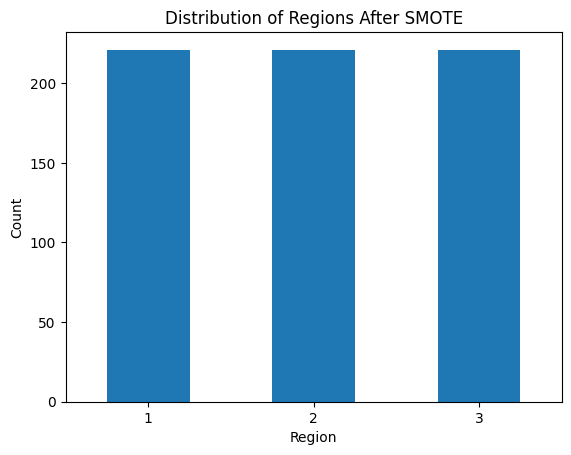

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter
import matplotlib.pyplot as plt

# Instantiate SMOTE
smote = SMOTE(random_state=1)

# SMOTE
x_train_smote, y_train_smote = smote.fit_resample(x_train_scaled, y_train)

print("Original dataset shape %s" % Counter(y_train))
print("Resampled dataset shape %s" % Counter(y_train_smote))

# Resampled data
y_train_smote.value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Regions After SMOTE')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [ ]:
# SVM SMOTE
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

svm_model = SVC(kernel='rbf', class_weight='balanced')

svm_model.fit(x_train_smote, y_train_smote)

y_pred_svmsote = svm_model.predict(x_test_scaled)

accuracy_svm_smote = accuracy_score(y_test, y_pred_svmsote)
print(f"SVM Model Accuracy: {accuracy_svm:.4f}\n")

print("Classification Report (SVM):")
print(classification_report(y_test, y_pred_svmsote))

print("Confusion Matrix (SVM):")
print(confusion_matrix(y_test, y_pred_svmsote, labels=np.unique(y_test)))


SVM Model Accuracy: 0.4242

Classification Report (SVM):
              precision    recall  f1-score   support

           1       0.15      0.26      0.19        23
           2       0.11      0.29      0.16        14
           3       0.71      0.42      0.53        95

    accuracy                           0.38       132
   macro avg       0.33      0.32      0.29       132
weighted avg       0.55      0.38      0.43       132

Confusion Matrix (SVM):
[[ 6  8  9]
 [ 3  4  7]
 [30 25 40]]


In [ ]:
# LOGREG + SMOTE + PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA
import numpy as np

# PCA
pca_smote = PCA(n_components=0.95, random_state=1)

Xtr_smote_pca = pca_smote.fit_transform(x_train_smote)
Xte_pca_from_smote = pca_smote.transform(x_test_scaled)

print("PCA components kept (after SMOTE):", pca_smote.n_components_)
print("Explained variance ratio per PC (after SMOTE):", np.round(pca_smote.explained_variance_ratio_, 4))
print("Total explained variance (after SMOTE): {:.2f}%".format(100 * pca_smote.explained_variance_ratio_.sum()))


# Train Logistic Regression on SMOTE + PCA data
lr_smote_pca = LogisticRegression(random_state=1, multi_class='multinomial', solver='lbfgs', max_iter=1000)

# Fit
lr_smote_pca.fit(Xtr_smote_pca, y_train_smote)

# Predict
y_pred_logreg_smote_pca = lr_smote_pca.predict(Xte_pca_from_smote)

# Evaluate
accuracy_logreg_smote_pca = accuracy_score(y_test, y_pred_logreg_smote_pca)
print(f"\nLogistic Regression Model Accuracy (with SMOTE + PCA): {accuracy_logreg_smote_pca:.4f}\n")

print("Classification Report (Logistic Regression with SMOTE + PCA):")
print(classification_report(y_test, y_pred_logreg_smote_pca))

print("Confusion Matrix (Logistic Regression with SMOTE + PCA):")
print(confusion_matrix(y_test, y_pred_logreg_smote_pca, labels=np.unique(y_test)))

PCA components kept (after SMOTE): 4
Explained variance ratio per PC (after SMOTE): [0.4045 0.2841 0.1666 0.1042]
Total explained variance (after SMOTE): 95.94%

Logistic Regression Model Accuracy (with SMOTE + PCA): 0.3182

Classification Report (Logistic Regression with SMOTE + PCA):
              precision    recall  f1-score   support

           1       0.12      0.13      0.13        23
           2       0.11      0.57      0.18        14
           3       0.91      0.33      0.48        95

    accuracy                           0.32       132
   macro avg       0.38      0.34      0.26       132
weighted avg       0.69      0.32      0.39       132

Confusion Matrix (Logistic Regression with SMOTE + PCA):
[[ 3 18  2]
 [ 5  8  1]
 [16 48 31]]


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [ ]:
# SVM PCA SMOTE
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

# PCA
pca = PCA(n_components=0.95, random_state=1)

Xtr_pca = pca.fit_transform(x_train_smote)
Xte_pca = pca.transform(x_test_scaled)

print("PCA components kept:", pca.n_components_)
print("Explained variance ratio per PC:", np.round(pca.explained_variance_ratio_, 4))
print("Total explained variance: {:.2f}%".format(100 * pca.explained_variance_ratio_.sum()))

# SVM
svm_model = SVC(kernel='rbf', class_weight='balanced')
svm_model.fit(Xtr_pca, y_train_smote)

y_pred = svm_model.predict(Xte_pca)

accuracy_svm_smote_pca = accuracy_score(y_test, y_pred)
print(f"\nSVM+PCA Model Accuracy: {accuracy_svm_smote_pca:.4f}\n")

print("Classification Report (SVM+PCA):")
print(classification_report(y_test, y_pred))

print("Confusion Matrix (SVM+PCA):")
print(confusion_matrix(y_test, y_pred, labels=np.unique(y_test)))


PCA components kept: 4
Explained variance ratio per PC: [0.4045 0.2841 0.1666 0.1042]
Total explained variance: 95.94%

SVM+PCA Model Accuracy: 0.3561

Classification Report (SVM+PCA):
              precision    recall  f1-score   support

           1       0.15      0.22      0.18        23
           2       0.14      0.57      0.23        14
           3       0.81      0.36      0.50        95

    accuracy                           0.36       132
   macro avg       0.37      0.38      0.30       132
weighted avg       0.62      0.36      0.41       132

Confusion Matrix (SVM+PCA):
[[ 5 14  4]
 [ 2  8  4]
 [26 35 34]]


In [ ]:
# Random Forest + SMOTE + PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA
import numpy as np

# PCA
pca_smote = PCA(n_components=0.95, random_state=1)

Xtr_smote_pca = pca_smote.fit_transform(x_train_smote)
Xte_pca_from_smote = pca_smote.transform(x_test_scaled)

print("PCA components kept (after SMOTE):", pca_smote.n_components_)
print("Explained variance ratio per PC (after SMOTE):", np.round(pca_smote.explained_variance_ratio_, 4))
print("Total explained variance (after SMOTE): {:.2f}%".format(100 * pca_smote.explained_variance_ratio_.sum()))


# Train Random Forest on SMOTE + PCA data
rf_smote_pca = RandomForestClassifier(random_state=1, class_weight='balanced')

# Fit
rf_smote_pca.fit(Xtr_smote_pca, y_train_smote)

# Predict
y_pred_rf_smote_pca = rf_smote_pca.predict(Xte_pca_from_smote)

# Evaluate
accuracy_rf_smote_pca = accuracy_score(y_test, y_pred_rf_smote_pca)
print(f"\nRandom Forest Model Accuracy (with SMOTE + PCA): {accuracy_rf_smote_pca:.4f}\n")

print("Classification Report (Random Forest with SMOTE + PCA):")
print(classification_report(y_test, y_pred_rf_smote_pca))

print("Confusion Matrix (Random Forest with SMOTE + PCA):")
print(confusion_matrix(y_test, y_pred_rf_smote_pca, labels=np.unique(y_test)))

PCA components kept (after SMOTE): 4
Explained variance ratio per PC (after SMOTE): [0.4045 0.2841 0.1666 0.1042]
Total explained variance (after SMOTE): 95.94%

Random Forest Model Accuracy (with SMOTE + PCA): 0.5000

Classification Report (Random Forest with SMOTE + PCA):
              precision    recall  f1-score   support

           1       0.06      0.04      0.05        23
           2       0.04      0.07      0.05        14
           3       0.74      0.67      0.70        95

    accuracy                           0.50       132
   macro avg       0.28      0.26      0.27       132
weighted avg       0.54      0.50      0.52       132

Confusion Matrix (Random Forest with SMOTE + PCA):
[[ 1 11 11]
 [ 1  1 12]
 [16 15 64]]


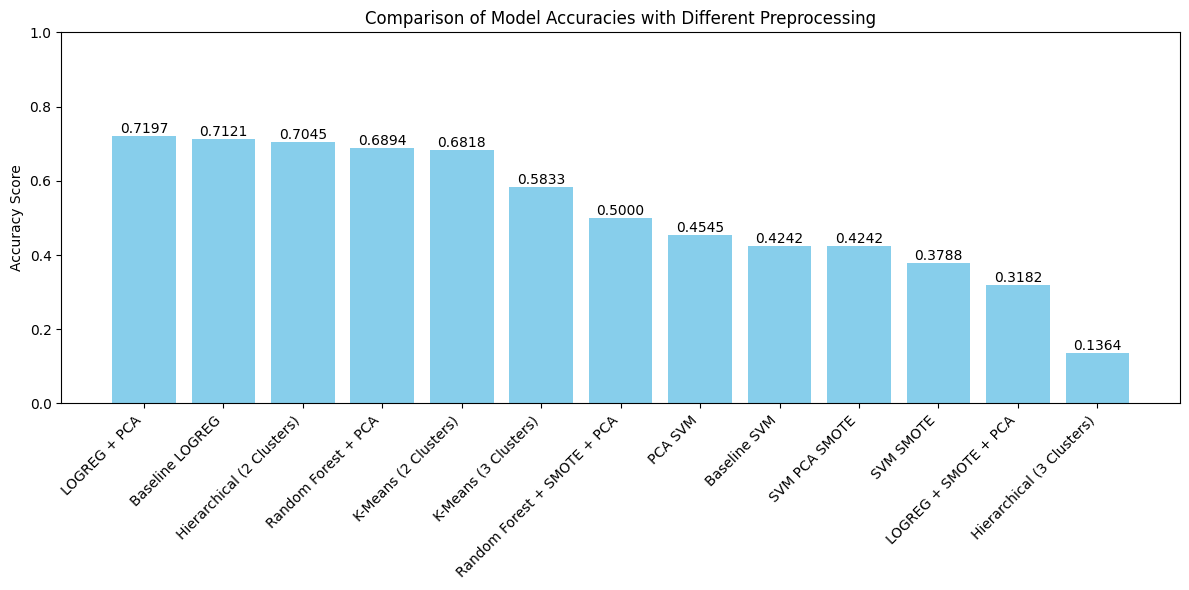

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

model_accuracies = {
    'Baseline LOGREG': accuracy_logreg,
    'Baseline SVM': accuracy_svm,
    'Random Forest + PCA': accuracy_rf_pca,
    'LOGREG + PCA': accuracy_logreg_pca,
    'PCA SVM': accuracy_svm_pca,
    'SVM SMOTE': accuracy_svm_smote,
    'LOGREG + SMOTE + PCA': accuracy_logreg_smote_pca,
    'SVM PCA SMOTE': accuracy_svm,
    'Random Forest + SMOTE + PCA': accuracy_rf_smote_pca,
    'K-Means (3 Clusters)': accuracy_3_kmeans,
    'K-Means (2 Clusters)': accuracy_2_kmeans,
    'Hierarchical (2 Clusters)': accuracy_2_hier,
    'Hierarchical (3 Clusters)': accuracy_3_hier
}

# By accuracy
sorted_models = sorted(model_accuracies.items(), key=lambda item: item[1], reverse=True)
model_names = [item[0] for item in sorted_models]
accuracies = [item[1] for item in sorted_models]

# Bar plot
plt.figure(figsize=(12, 6))
bars = plt.bar(model_names, accuracies, color='skyblue')
plt.ylabel('Accuracy Score')
plt.title('Comparison of Model Accuracies with Different Preprocessing')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)
plt.tight_layout()

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.4f}', va='bottom', ha='center') # va: vertical alignment, ha: horizontal alignment

plt.show()

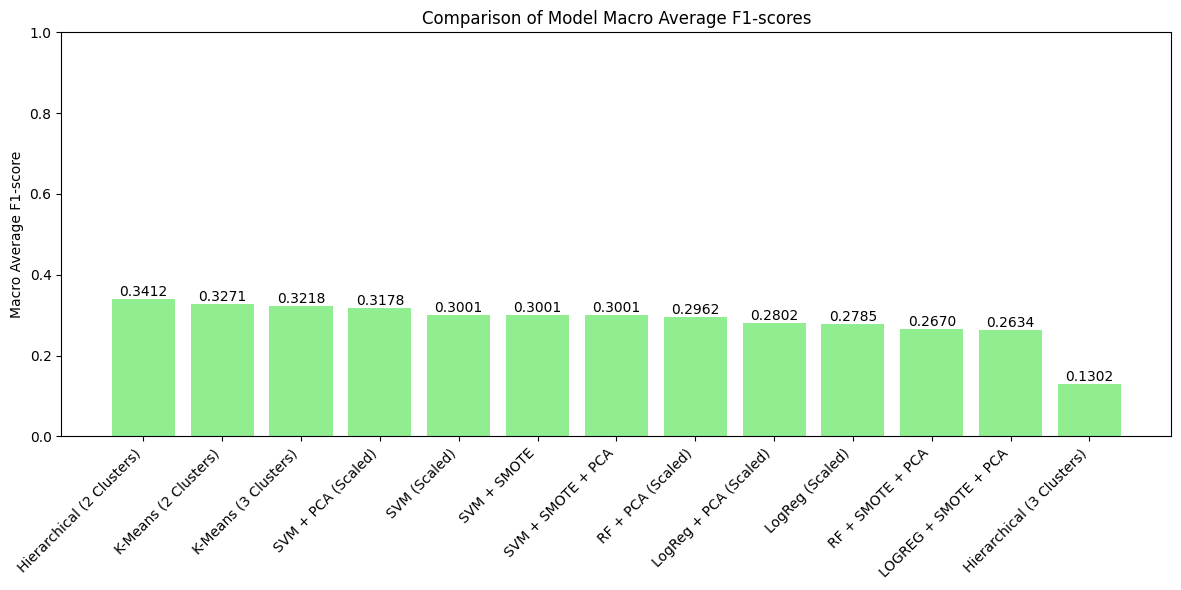

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import f1_score

# Calculate macro average F1-scores for each model
model_f1_scores = {
    'LogReg (Scaled)': f1_score(y_test, y_pred_logreg, average='macro'),
    'SVM (Scaled)': f1_score(y_test, y_pred, average='macro'),
    'RF + PCA (Scaled)': f1_score(y_test, y_pred_rf_pca, average='macro'),
    'LogReg + PCA (Scaled)': f1_score(y_test, y_pred_logreg_pca, average='macro'),
    'SVM + PCA (Scaled)': f1_score(y_test, y_pred_pca, average='macro'),
    'SVM + SMOTE': f1_score(y_test, y_pred, average='macro'),
    'LOGREG + SMOTE + PCA': f1_score(y_test, y_pred_logreg_smote_pca, average='macro'),
    'SVM + SMOTE + PCA': f1_score(y_test, y_pred, average='macro'),
    'RF + SMOTE + PCA': f1_score(y_test, y_pred_rf_smote_pca, average='macro'),
    'K-Means (3 Clusters)': f1_score(y_test, mapped_kmeans_test_labels3, average='macro'),
    'K-Means (2 Clusters)': f1_score(y_test, mapped_kmeans_test_labels2, average='macro'),
    'Hierarchical (2 Clusters)': f1_score(y_test, mapped_hier_test_labels2, average='macro'),
    'Hierarchical (3 Clusters)': f1_score(y_test, mapped_hier_test_labels3, average='macro')
}

# Sort
sorted_models_f1 = sorted(model_f1_scores.items(), key=lambda item: item[1], reverse=True)
model_names_f1 = [item[0] for item in sorted_models_f1]
f1_scores = [item[1] for item in sorted_models_f1]

# F1-scores
plt.figure(figsize=(12, 6))
bars_f1 = plt.bar(model_names_f1, f1_scores, color='lightgreen')
plt.ylabel('Macro Average F1-score')
plt.title('Comparison of Model Macro Average F1-scores')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)
plt.tight_layout()

for bar in bars_f1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.4f}', va='bottom', ha='center')

plt.show()

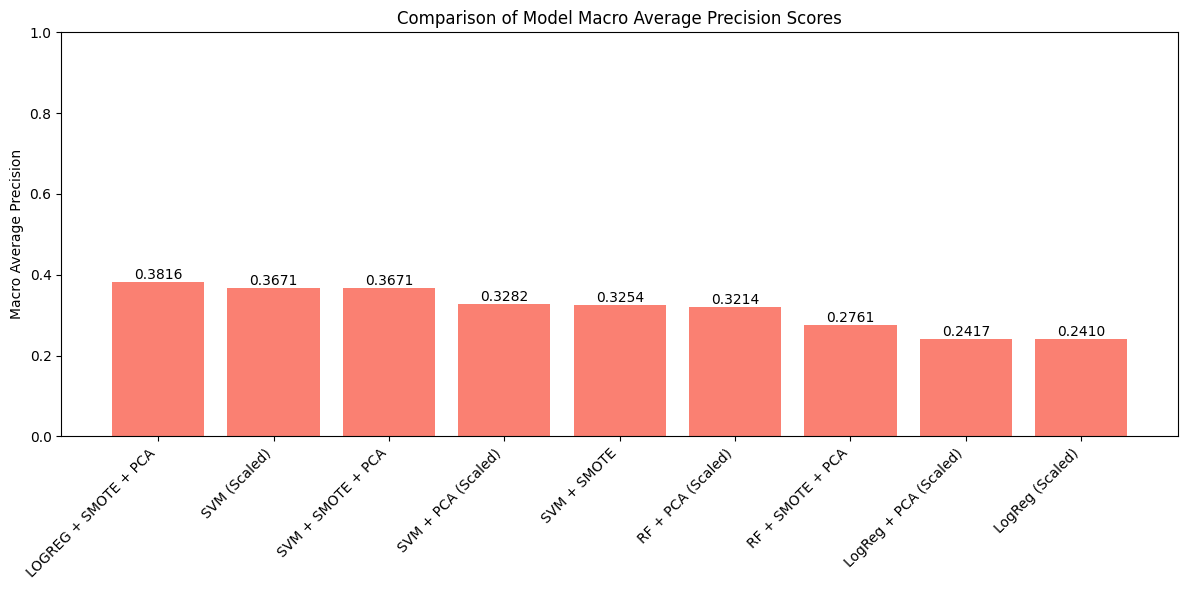

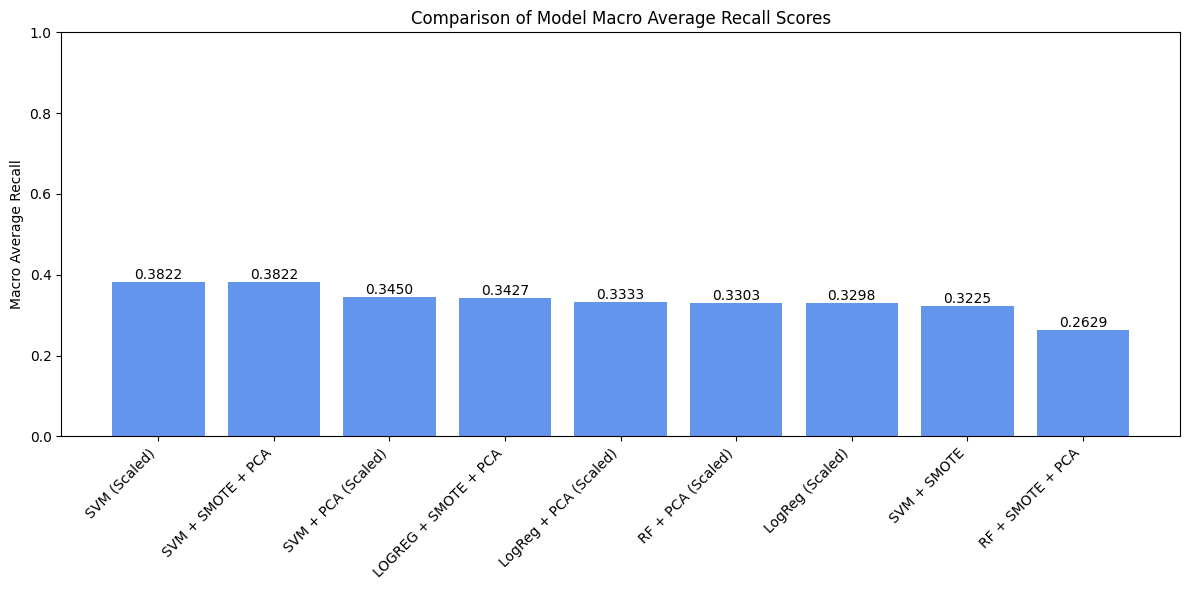

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_score, recall_score

# Precision and Recall for each model
model_precision_scores = {
    'LogReg (Scaled)': precision_score(y_test, y_pred_logreg, average='macro', zero_division=0),
    'SVM (Scaled)': precision_score(y_test, y_pred, average='macro', zero_division=0),
    'RF + PCA (Scaled)': precision_score(y_test, y_pred_rf_pca, average='macro', zero_division=0),
    'LogReg + PCA (Scaled)': precision_score(y_test, y_pred_logreg_pca, average='macro', zero_division=0),
    'SVM + PCA (Scaled)': precision_score(y_test, y_pred_pca, average='macro', zero_division=0),
    'SVM + SMOTE': precision_score(y_test, y_pred_svmsote, average='macro', zero_division=0),
    'LOGREG + SMOTE + PCA': precision_score(y_test, y_pred_logreg_smote_pca, average='macro', zero_division=0),
    'SVM + SMOTE + PCA': precision_score(y_test, y_pred, average='macro', zero_division=0),
    'RF + SMOTE + PCA': precision_score(y_test, y_pred_rf_smote_pca, average='macro', zero_division=0),
}

model_recall_scores = {
    'LogReg (Scaled)': recall_score(y_test, y_pred_logreg, average='macro', zero_division=0),
    'SVM (Scaled)': recall_score(y_test, y_pred, average='macro', zero_division=0),
    'RF + PCA (Scaled)': recall_score(y_test, y_pred_rf_pca, average='macro', zero_division=0),
    'LogReg + PCA (Scaled)': recall_score(y_test, y_pred_logreg_pca, average='macro', zero_division=0),
    'SVM + PCA (Scaled)': recall_score(y_test, y_pred_pca, average='macro', zero_division=0),
    'SVM + SMOTE': recall_score(y_test, y_pred_svmsote, average='macro', zero_division=0),
    'LOGREG + SMOTE + PCA': recall_score(y_test, y_pred_logreg_smote_pca, average='macro', zero_division=0),
    'SVM + SMOTE + PCA': recall_score(y_test, y_pred, average='macro', zero_division=0),
    'RF + SMOTE + PCA': recall_score(y_test, y_pred_rf_smote_pca, average='macro', zero_division=0),
}


# Sort
sorted_models_precision = sorted(model_precision_scores.items(), key=lambda item: item[1], reverse=True)
model_names_precision = [item[0] for item in sorted_models_precision]
precision_scores = [item[1] for item in sorted_models_precision]

sorted_models_recall = sorted(model_recall_scores.items(), key=lambda item: item[1], reverse=True)
model_names_recall = [item[0] for item in sorted_models_recall]
recall_scores = [item[1] for item in sorted_models_recall]


# Bar plot for Precision scores
plt.figure(figsize=(12, 6))
bars_precision = plt.bar(model_names_precision, precision_scores, color='salmon')
plt.ylabel('Macro Average Precision')
plt.title('Comparison of Model Macro Average Precision Scores')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)
plt.tight_layout()
for bar in bars_precision:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.4f}', va='bottom', ha='center')
plt.show()


# Recall scores
plt.figure(figsize=(12, 6))
bars_recall = plt.bar(model_names_recall, recall_scores, color='cornflowerblue')
plt.ylabel('Macro Average Recall')
plt.title('Comparison of Model Macro Average Recall Scores')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)
plt.tight_layout()

for bar in bars_recall:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.4f}', va='bottom', ha='center')
plt.show()